In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [38]:
#import the data
heart = pd.read_csv(r"D:\Suhani\CHD_preprocessed.csv")
heart

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartStroke
0,1,39,1,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,0,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,1,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,1,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
4129,1,51,1,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0
4130,0,48,0,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86,0
4131,0,44,0,1,15,0,0,0,0,210,126.5,87.0,19.16,86,82,0


In [39]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   int64  
 5   BPMeds           4133 non-null   int64  
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   int64  
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   int64  
 14  glucose          4133 non-null   int64  
 15  HeartStroke      4133 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 516.8 KB


In [40]:
heart.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
HeartStroke        0
dtype: int64

In [41]:
heart.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartStroke
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


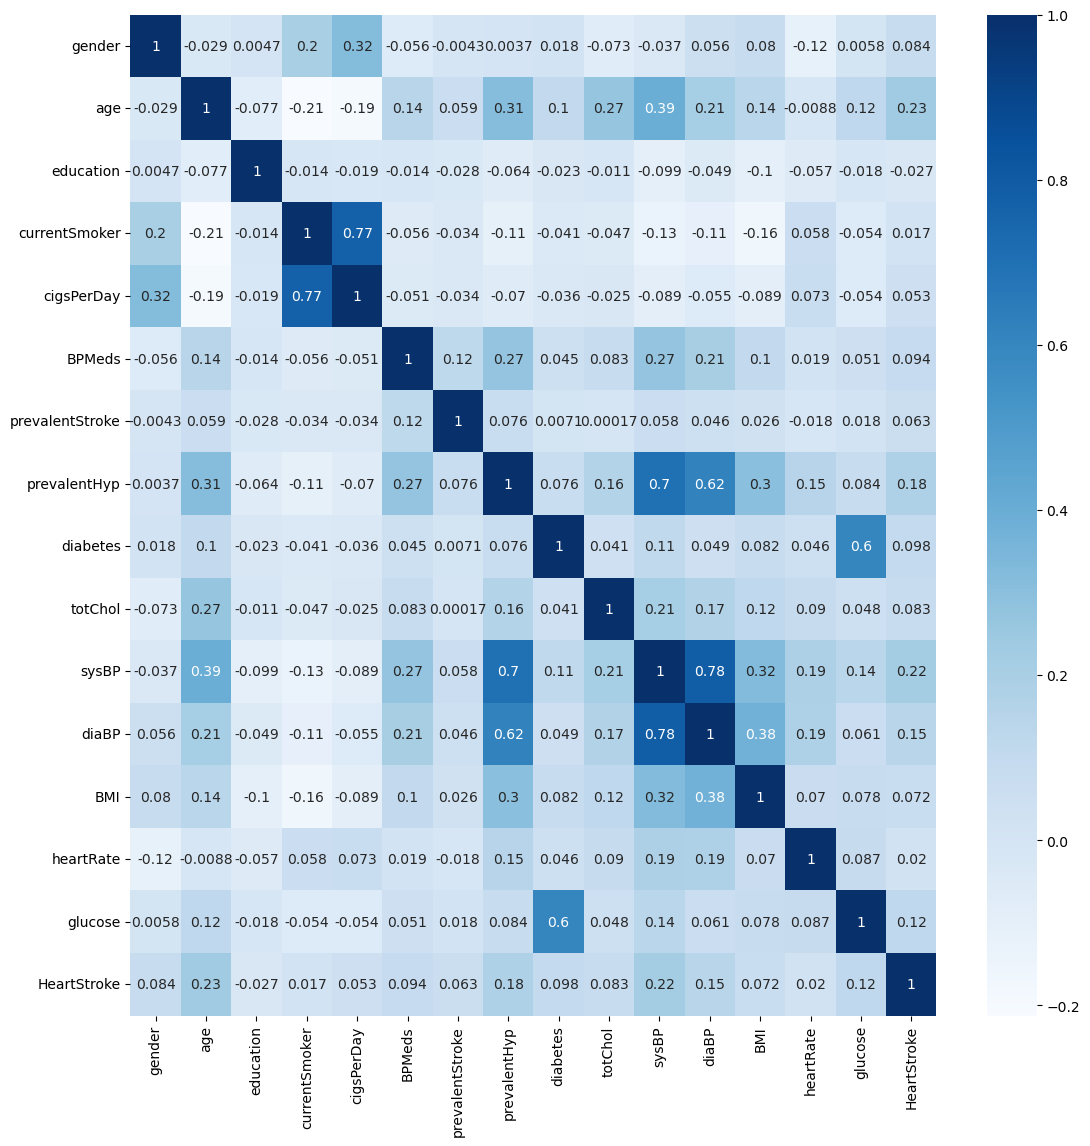

In [42]:
plt.figure(figsize=(13,13))
sns.heatmap(heart.corr(),cmap='Blues',annot=True)
plt.show()

In [43]:
vif_data=pd.DataFrame()
vif_data["features"]=heart.columns

vif_data["VIF"] = [variance_inflation_factor(heart.values, i)
                          for i in range(len(heart.columns))]
  
print(vif_data)

           features         VIF
0            gender    2.094578
1               age   41.593824
2         education    1.400779
3     currentSmoker    4.938971
4        cigsPerDay    4.281047
5            BPMeds    1.152004
6   prevalentStroke    1.028475
7      prevalentHyp    2.390097
8          diabetes    1.560082
9           totChol   31.999496
10            sysBP  138.005718
11            diaBP  134.506056
12              BMI   44.994292
13        heartRate   38.593406
14          glucose   20.859742
15      HeartStroke    1.288264


In [44]:
contingency_table=pd.crosstab(heart["currentSmoker"],heart["HeartStroke"])
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:,0])
no_of_columns=len(contingency_table.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05 
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 HeartStroke       0    1
currentSmoker           
0              1783  305
1              1722  323
Observed Values :-
 [[1783  305]
 [1722  323]]
Expected Values :-
 [[1770.73312364  317.26687636]
 [1734.26687636  310.73312364]]
Degree of Freedom:- 1
chi-square statistic:- 1.130297375354459
critical_value: 3.841458820694124
p-value: 0.2877119170835991
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1.130297375354459
critical_value: 3.841458820694124
p-value: 0.2877119170835991
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [45]:
contingency_table=pd.crosstab(heart["gender"],heart["HeartStroke"])
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:,0])
no_of_columns=len(contingency_table.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05 
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 HeartStroke     0    1
gender                
0            2069  298
1            1436  330
Observed Values :-
 [[2069  298]
 [1436  330]]
Expected Values :-
 [[2007.33970481  359.66029519]
 [1497.66029519  268.33970481]]
Degree of Freedom:- 1
chi-square statistic:- 29.172308095791227
critical_value: 3.841458820694124
p-value: 6.621889725444419e-08
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 29.172308095791227
critical_value: 3.841458820694124
p-value: 6.621889725444419e-08
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [46]:
contingency_table=pd.crosstab(heart["education"],heart["HeartStroke"])
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:,0])
no_of_columns=len(contingency_table.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05 
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 HeartStroke     0    1
education             
0            2503  470
1            1002  158
Observed Values :-
 [[2503  470]
 [1002  158]]
Expected Values :-
 [[2521.25937576  451.74062424]
 [ 983.74062424  176.25937576]]
Degree of Freedom:- 1
chi-square statistic:- 3.100755361593883
critical_value: 3.841458820694124
p-value: 0.07825597637337878
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 3.100755361593883
critical_value: 3.841458820694124
p-value: 0.07825597637337878
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [47]:
contingency_table=pd.crosstab(heart["sysBP"],heart["HeartStroke"])
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:,0])
no_of_columns=len(contingency_table.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05 
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 HeartStroke  0  1
sysBP            
83.5         1  1
85.0         1  0
85.5         0  1
90.0         2  0
92.0         1  0
...         .. ..
235.0        0  1
243.0        1  0
244.0        0  1
248.0        0  1
295.0        0  1

[234 rows x 2 columns]
Observed Values :-
 [[ 1  1]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  0]
 [ 1  1]
 [ 2  0]
 [ 1  0]
 [ 3  0]
 [ 7  0]
 [ 3  0]
 [11  0]
 [ 4  0]
 [ 8  0]
 [ 3  1]
 [10  4]
 [ 1  0]
 [ 8  0]
 [ 1  0]
 [24  2]
 [ 6  0]
 [19  1]
 [ 1  0]
 [29  2]
 [10  1]
 [16  3]
 [ 0  2]
 [19  2]
 [ 1  1]
 [43  0]
 [ 5  0]
 [26  2]
 [ 2  0]
 [34  0]
 [27  2]
 [48  0]
 [ 9  0]
 [30  5]
 [ 7  0]
 [84  9]
 [ 3  0]
 [53  2]
 [ 7  1]
 [47  8]
 [39  3]
 [44  4]
 [12  2]
 [57  7]
 [ 7  1]
 [80  6]
 [ 6  2]
 [64  5]
 [ 8  1]
 [30  6]
 [34  3]
 [57  4]
 [15  4]
 [61  5]
 [ 6  2]
 [97 10]
 [ 8  4]
 [53  5]
 [14  2]
 [73  6]
 [28  3]
 [57 12]
 [11  1]
 [77  5]
 [ 9  1]
 [77  8]
 [ 8  1]
 [62 10]
 [16  5]
 [51 10]
 [40  8]
 [60 11]
 [13  0]
 [55  7

In [48]:
contingency_table=pd.crosstab(heart["diaBP"],heart["HeartStroke"])
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:,0])
no_of_columns=len(contingency_table.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05 
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 HeartStroke  0  1
diaBP            
48.0         0  1
50.0         1  0
51.0         0  1
52.0         2  0
53.0         1  0
...         .. ..
133.0        2  0
135.0        0  2
136.0        2  0
140.0        0  1
142.5        1  0

[146 rows x 2 columns]
Observed Values :-
 [[  0   1]
 [  1   0]
 [  0   1]
 [  2   0]
 [  1   0]
 [  0   1]
 [  1   2]
 [  2   0]
 [  5   1]
 [  3   0]
 [  4   0]
 [  9   2]
 [  3   0]
 [ 25   3]
 [  1   0]
 [ 15   2]
 [  2   0]
 [ 20   1]
 [  5   3]
 [ 10   1]
 [  4   1]
 [ 22   3]
 [  8   0]
 [ 31   5]
 [  4   0]
 [ 30   4]
 [ 15   5]
 [ 39   4]
 [ 25   1]
 [ 38   8]
 [  6   0]
 [ 55   4]
 [  2   1]
 [117  15]
 [ 13   0]
 [ 63   5]
 [  7   0]
 [ 82   6]
 [ 53   6]
 [ 79   8]
 [ 14   3]
 [ 86  15]
 [ 14   1]
 [ 95  12]
 [ 16   2]
 [ 76  15]
 [ 19   1]
 [ 67   5]
 [ 48   2]
 [ 95  18]
 [ 12   2]
 [ 89  12]
 [ 10   1]
 [227  30]
 [ 10   1]
 [113  16]
 [ 10   3]
 [131  20]
 [ 39   6]
 [ 77  15]
 [ 18   1]
 [101  16]
 [ 10   3]
 [112  

In [49]:
contingency_table=pd.crosstab(heart["age"],heart["HeartStroke"])
print('contingency_table :-\n',contingency_table)#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:,0])
no_of_columns=len(contingency_table.iloc[0,0:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05 
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 HeartStroke    0   1
age                 
32             1   0
33             5   0
34            16   0
35            39   2
36            81   2
37            85   4
38           131   8
39           162   6
40           173  15
41           160  11
42           162  14
43           144  13
44           147  15
45           144  14
46           164  16
47           114  21
48           147  20
49           106  24
50           114  21
51           113  28
52           115  31
53           114  23
54           114  18
55           115  23
56            92  26
57            92  26
58            86  31
59            87  30
60            84  25
61            81  24
62            73  25
63            76  31
64            68  20
65            35  19
66            23  15
67            26  17
68            10   8
69             5   1
70             1   1
Observed Values :-
 [[  1   0]
 [  5   0]
 [ 16   0]
 [ 39   2]
 [ 81   2]
 [ 85   4]
 [131   8]
 [162   6]
 [173  15

In [50]:
X = heart.drop(["HeartStroke","education","currentSmoker",'glucose','sysBP','diaBP'],axis=1)
y = heart["HeartStroke"]

In [51]:
X.columns

Index(['gender', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate'],
      dtype='object')

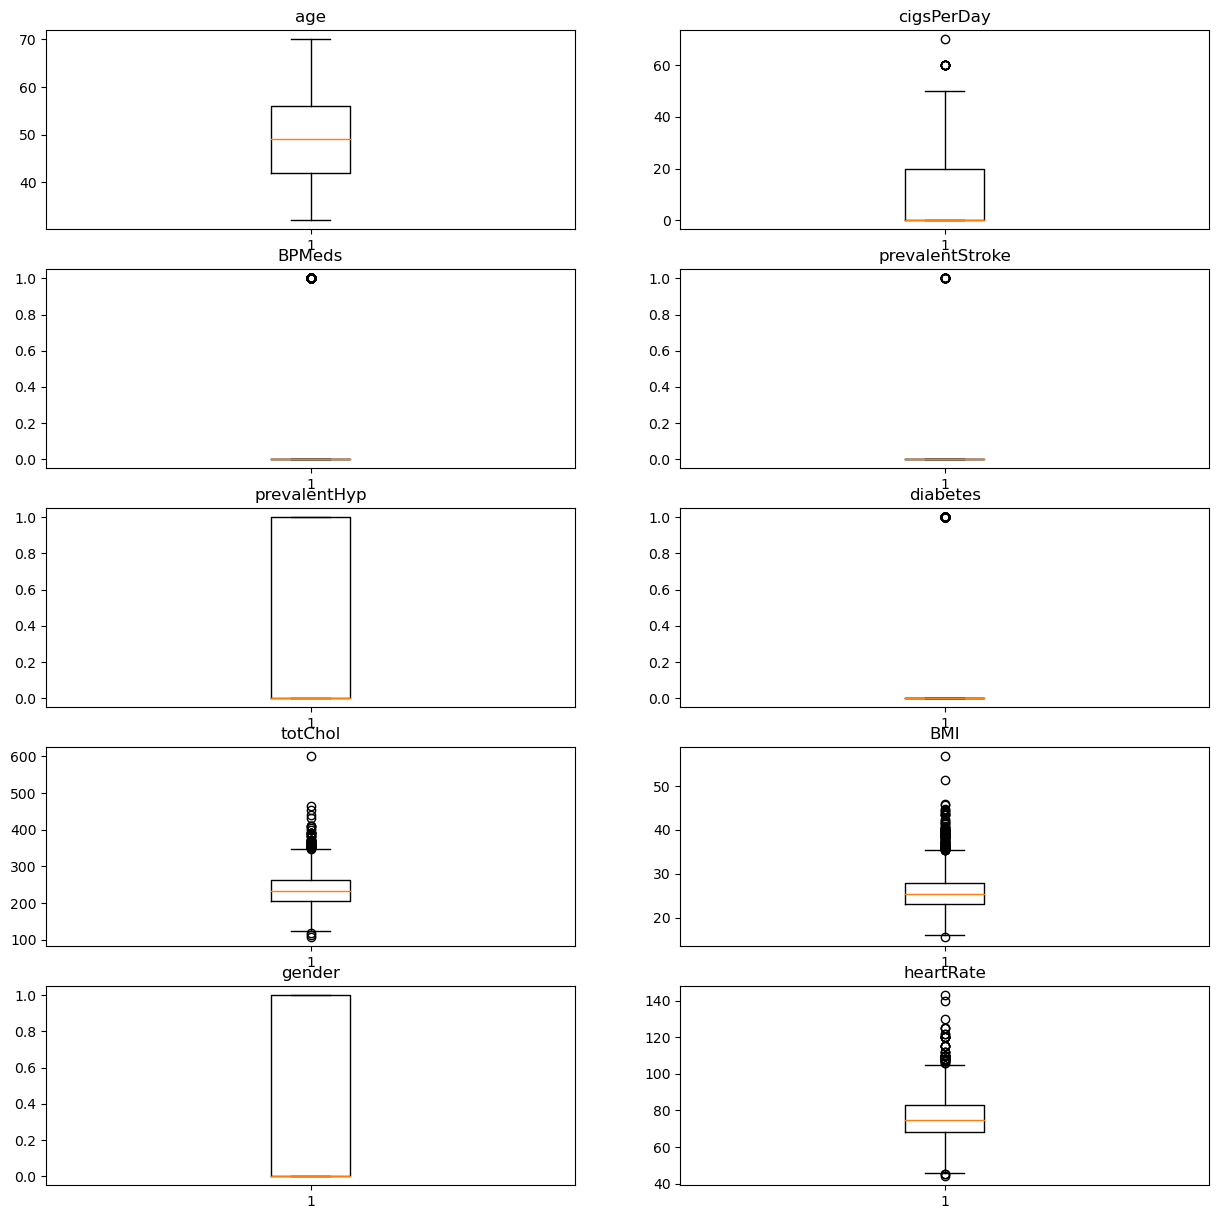

In [52]:
#Outlier Detection using Boxplot
import matplotlib.pyplot as plt
data = heart
plt.figure(figsize=(15,15))

plt.subplot(5,2,1)
plt.boxplot(data["age"])
plt.title("age")

plt.subplot(5,2,2)
plt.boxplot(data["cigsPerDay"])
plt.title("cigsPerDay")

plt.subplot(5,2,3)
plt.boxplot(data["BPMeds"])
plt.title("BPMeds")

plt.subplot(5,2,4)
plt.boxplot(data["prevalentStroke"])
plt.title("prevalentStroke")

plt.subplot(5,2,5)
plt.boxplot(data["prevalentHyp"])
plt.title("prevalentHyp")

plt.subplot(5,2,6)
plt.boxplot(data["diabetes"])
plt.title("diabetes")

plt.subplot(5,2,7)
plt.boxplot(data["totChol"])
plt.title("totChol")

plt.subplot(5,2,8)
plt.boxplot(data["BMI"])
plt.title("BMI")

plt.subplot(5,2,9)
plt.boxplot(data["gender"])
plt.title("gender")

plt.subplot(5,2,10)
plt.boxplot(data["heartRate"])
plt.title("heartRate")

plt.show()

In [53]:
std = StandardScaler()
X = std.fit_transform(X)

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=21,test_size=0.15)

In [55]:
#fit the Logistic Regression model
model1=LogisticRegression()
model1.fit(X_train,y_train)

y_train_pred_log=model1.predict(X_train)

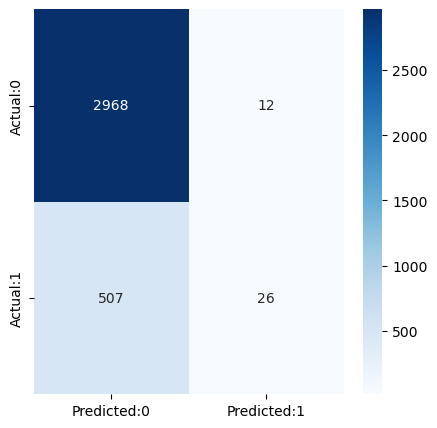

The details of Confusion_matrix is:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2980
           1       0.68      0.05      0.09       533

    accuracy                           0.85      3513
   macro avg       0.77      0.52      0.51      3513
weighted avg       0.83      0.85      0.79      3513

Accuracy of Logistic Regression Model: 0.852263023057216


In [56]:
cm = confusion_matrix(y_train,y_train_pred_log)
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,fmt='d',cmap='Blues',annot=True)
plt.show()

print('The details of Confusion_matrix is:')
print(classification_report(y_train,y_train_pred_log))

print('Accuracy of Logistic Regression Model:',accuracy_score(y_train_pred_log,y_train))

In [57]:
model2=xg.XGBClassifier()
model2.fit(X_train,y_train)

y_train_pred_xg=model2.predict(X_train)

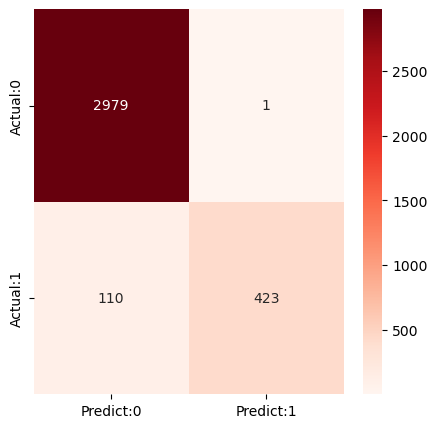

The details of Confusion matrix:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2980
           1       1.00      0.79      0.88       533

    accuracy                           0.97      3513
   macro avg       0.98      0.90      0.93      3513
weighted avg       0.97      0.97      0.97      3513

Accuracy Score of XGBoost: 0.968403074295474


In [58]:
cm = confusion_matrix(y_train,y_train_pred_xg)
conf_matrix=pd.DataFrame(data=cm, columns=["Predict:0","Predict:1"],index=["Actual:0","Actual:1"])

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
plt.show()

print("The details of Confusion matrix:")
print(classification_report(y_train,y_train_pred_xg))

print("Accuracy Score of XGBoost:",accuracy_score(y_train_pred_xg,y_train))

In [59]:
y_test_pred_log=model1.predict(X_test)

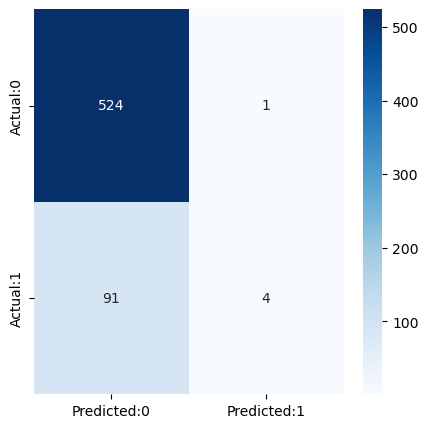

The details of Confusion_matrix is:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       525
           1       0.80      0.04      0.08        95

    accuracy                           0.85       620
   macro avg       0.83      0.52      0.50       620
weighted avg       0.84      0.85      0.79       620

Accuracy of Logistic Regression Model: 0.8516129032258064


In [60]:
cm = confusion_matrix(y_test,y_test_pred_log)
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,fmt='d',cmap='Blues',annot=True)
plt.show()

print('The details of Confusion_matrix is:')
print(classification_report(y_test,y_test_pred_log))

print('Accuracy of Logistic Regression Model:',accuracy_score(y_test_pred_log,y_test))

In [61]:
y_test_pred_xg = model2.predict(X_test)

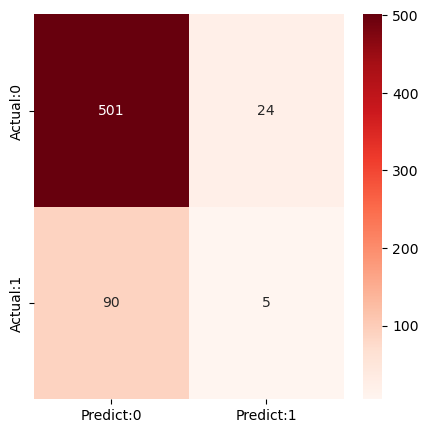

The details of Confusion matrix:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       525
           1       0.17      0.05      0.08        95

    accuracy                           0.82       620
   macro avg       0.51      0.50      0.49       620
weighted avg       0.74      0.82      0.77       620

Accuracy Score of XGBoost: 0.8161290322580645


In [62]:
cm = confusion_matrix(y_test,y_test_pred_xg)
conf_matrix=pd.DataFrame(data=cm, columns=["Predict:0","Predict:1"],index=["Actual:0","Actual:1"])

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
plt.show()

print("The details of Confusion matrix:")
print(classification_report(y_test,y_test_pred_xg))

print("Accuracy Score of XGBoost:",accuracy_score(y_test_pred_xg,y_test))

In [63]:
cross_tab_1=pd.crosstab(heart['BPMeds'],heart['HeartStroke'])
cross_tab_1

HeartStroke,0,1
BPMeds,,
0,3410,581
1,95,47


In [64]:
cross_tab_2=pd.crosstab(heart['prevalentStroke'],heart['HeartStroke'])
cross_tab_2

HeartStroke,0,1
prevalentStroke,,
0,3491,617
1,14,11


In [65]:
cross_tab_3=pd.crosstab(heart['prevalentHyp'],heart['HeartStroke'])
cross_tab_3

HeartStroke,0,1
prevalentHyp,,
0,2538,309
1,967,319


In [66]:
cross_tab_4=pd.crosstab(heart['diabetes'],heart['HeartStroke'])
cross_tab_4

HeartStroke,0,1
diabetes,,
0,3438,589
1,67,39


In [67]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)

y_train_pred_rf = model3.predict(X_train)

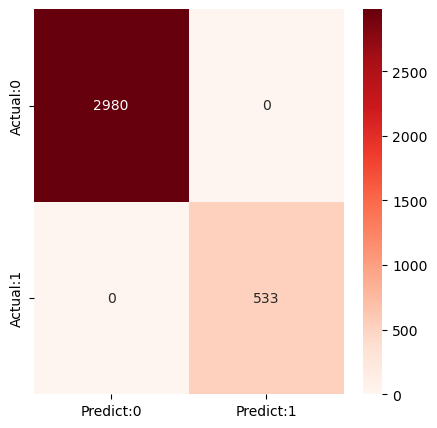

The details of Confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2980
           1       1.00      1.00      1.00       533

    accuracy                           1.00      3513
   macro avg       1.00      1.00      1.00      3513
weighted avg       1.00      1.00      1.00      3513

Accuracy Score of XGBoost: 1.0


In [68]:
cm = confusion_matrix(y_train,y_train_pred_rf)
conf_matrix=pd.DataFrame(data=cm, columns=["Predict:0","Predict:1"],index=["Actual:0","Actual:1"])

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
plt.show()

print("The details of Confusion matrix:")
print(classification_report(y_train,y_train_pred_rf))

print("Accuracy Score of XGBoost:",accuracy_score(y_train_pred_rf,y_train))

In [70]:
y_test_pred_rf = model3.predict(X_test)

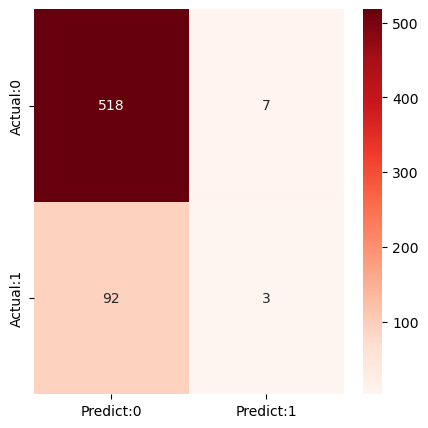

The details of Confusion matrix:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       525
           1       0.30      0.03      0.06        95

    accuracy                           0.84       620
   macro avg       0.57      0.51      0.48       620
weighted avg       0.77      0.84      0.78       620

Accuracy Score of XGBoost: 0.8403225806451613


In [71]:
cm = confusion_matrix(y_test,y_test_pred_rf)
conf_matrix=pd.DataFrame(data=cm, columns=["Predict:0","Predict:1"],index=["Actual:0","Actual:1"])

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
plt.show()

print("The details of Confusion matrix:")
print(classification_report(y_test,y_test_pred_rf))

print("Accuracy Score of XGBoost:",accuracy_score(y_test_pred_rf,y_test))

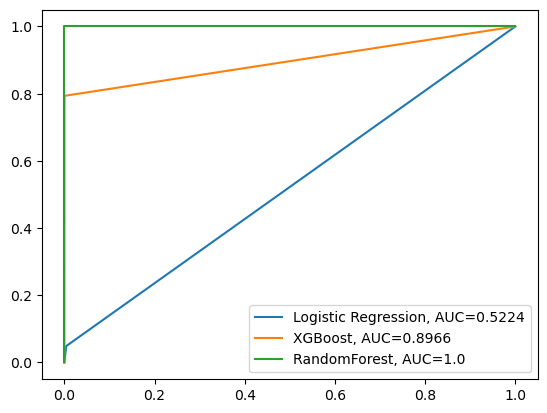

In [72]:
#Plor an roc curve
fpr, tpr, _ = metrics.roc_curve(y_train,y_train_pred_log)
auc = round(metrics.roc_auc_score(y_train,y_train_pred_log), 4)
plt.plot(fpr,tpr,label='Logistic Regression, AUC='+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train,y_train_pred_xg)
auc = round(metrics.roc_auc_score(y_train,y_train_pred_xg),4)
plt.plot(fpr,tpr,label='XGBoost, AUC='+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train,y_train_pred_rf)
auc = round(metrics.roc_auc_score(y_train,y_train_pred_rf),4)
plt.plot(fpr,tpr,label='RandomForest, AUC='+str(auc))

plt.legend()
plt.show()

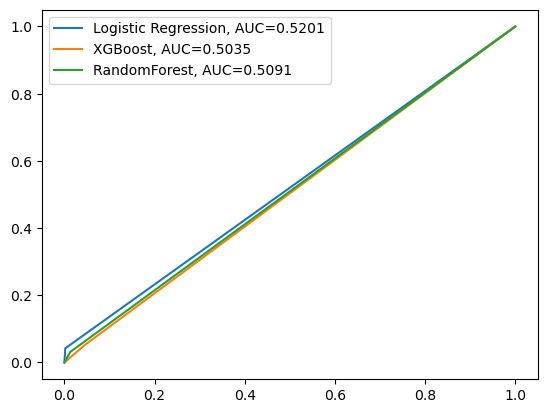

In [73]:
#Plor an roc curve
fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_log)
auc = round(metrics.roc_auc_score(y_test,y_test_pred_log), 4)
plt.plot(fpr,tpr,label='Logistic Regression, AUC='+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_xg)
auc = round(metrics.roc_auc_score(y_test,y_test_pred_xg),4)
plt.plot(fpr,tpr,label='XGBoost, AUC='+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test,y_test_pred_rf)
auc = round(metrics.roc_auc_score(y_test,y_test_pred_rf),4)
plt.plot(fpr,tpr,label='RandomForest, AUC='+str(auc))

plt.legend()
plt.show()